# Diamonds
* [Analiz](#1)
* [Görselleştirme](#2)

<a id="1"></a> <br>
## Analiz

In [1]:
# kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# veri setinin import edilip kullanıma hazır hale getirilmesi
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()

In [3]:
# veri setine ilk bakış
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Veri Setinin Hikayesi
**Elmasların özelliklerini ve değerlerini ele alan veri seti.**
* **carat**: kütle birimi 
* **cut**: elmasın kalitesi (Fair < Good < Very Good < Premium < Ideal)
* **color**: elmasın rengi (J < I < H < G < F < E < D)
* **clarity**: elmasın berraklığı (I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF)
* **depth**: toplam yükseklik yüzdesi
* **table**: elmasın en geniş noktasına göre genişliği
* **x**: elmasın uzunluğu (mm)
* **y**: elmasın genişliği (mm)
* **z**: elmasın yüksekliği (mm)

In [4]:
# veri setinin son 5 gözlemi
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
# veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


* DataFrame
* 53940 gözlem var 
* 10 değişkenden oluşuyor (6 adet float, 1 adet int, 3 adet object)
* Bellekte kapladığı alan 4.1+ MB

In [7]:
# veri setindeki object veri tiplerinin category veri tiplerine dönüşümü
df.cut = pd.Categorical(df.cut)
df.color = pd.Categorical(df.color)
df.clarity = pd.Categorical(df.clarity)

In [9]:
# veri setindeki değişkenlerin veri tipleri
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [8]:
# veri setinin gözlem ve değişken sayısı
df.shape
print(f"Veri setinde {df.shape[0]} tane gözlem ve {df.shape[1]} adet değişken bulunuyor.")

Veri setinde 53940 tane gözlem ve 10 adet değişken bulunuyor.


In [10]:
# veri setindeki değişken isimleri
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
# veri setindeki betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


* elmasların ortalama fiyatı 3932 dolar
* en ağır elmas 5.01 karat

In [13]:
# eksik değer var mı?
df.isnull().values.any() # yok

False

In [14]:
# kategorik değişkenler
kat_df = df.select_dtypes(include = ["category"])
kat_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [15]:
# kategorik değişkenlerin sınıflarına erişmek
kat_df.cut.unique()

[Ideal, Premium, Good, Very Good, Fair]
Categories (5, object): [Ideal, Premium, Good, Very Good, Fair]

In [18]:
# kategorik değişkenlerin sınıf sayısına erişmek
kat_df.cut.value_counts().count()

5

In [19]:
# kategorik değişkenlerin sınıf frekansına erişmek
kat_df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

* elmasların büyük çoğunluğu çok değerli sınıfında

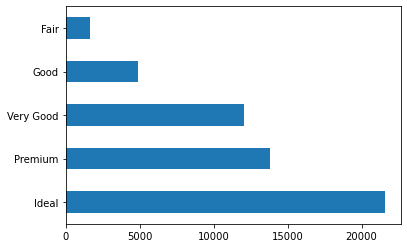

In [21]:
# kategorik değişkenlerin sınıf frekansını grafiğe dökmek
kat_df.cut.value_counts().plot.barh();

In [22]:
# nümerik değişkenler
num_df = df.select_dtypes(include = ["float64", "int64"])
num_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [23]:
# nümerik değişkenlerin betimsel istatistikleri
num_df.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [24]:
# rapor
print(f"Elmasların ortalama fiyatı: {num_df.price.mean()}")
print(f"En ucuz elmasın fiyatı: {num_df.price.min()}")
print(f"En pahalı elmasın fiyatı: {num_df.price.max()}")

Elmasların ortalama fiyatı: 3932.799721913237
En ucuz elmasın fiyatı: 326
En pahalı elmasın fiyatı: 18823


In [29]:
# ordinal olan kategorik değişkenleri değiştirmek
from pandas.api.types import CategoricalDtype
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
color_kategoriler = ["J","I","H","G","F","E","D"]
clarity_kategoriler = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_kategoriler, ordered = True))

<a id="2"></a> <br>
## Görselleştirme

In [31]:
kat_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [32]:
num_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


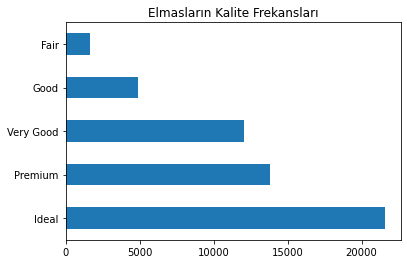

In [33]:
# kategorik değişkenin sınıflarının frekanslarını görselleştirmek
(df.cut
 .value_counts()
 .plot.barh()
 .set_title("Elmasların Kalite Frekansları")
);

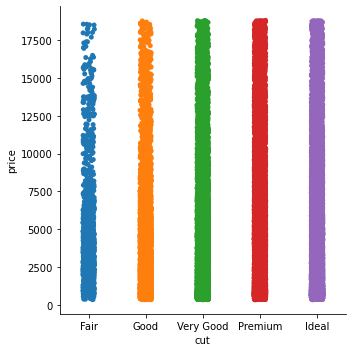

In [34]:
# veri setinde yer alan değişkenlerin birlikte değerlendirilmesi
sns.catplot(x = "cut", y = "price", data = df);

* Fair'den Ideal'a gidildikçe ücretlerdeki yoğunluk artıyor.

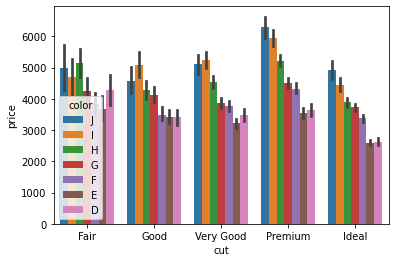

In [41]:
# grafiğe üçüncü bir boyut ekleyerek bilgiyi detaylandırmak
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

* Fair'de price color ile pek anlamlı olmasa da Premium ve Ideal'de daha anlamlı.

In [43]:
# verinin sunduğu bilgiyi doğrulamak
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

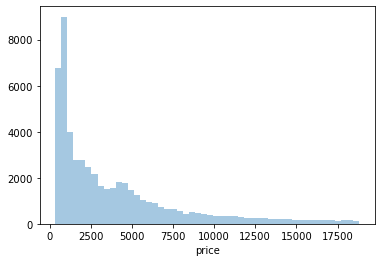

In [44]:
# nümerik değişkenin histogramı
sns.distplot(df.price, kde = False);

* Elmaslar 0 ile 5000 dolar arasında yoğunlukta

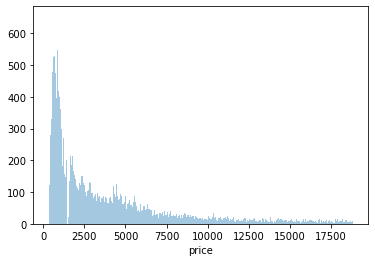

In [45]:
# nümerik değişkenin hassas diyagramı
sns.distplot(df.price, bins = 1000, kde = False);

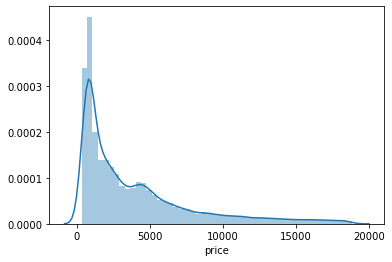

In [47]:
# histogram ve yoğunluk grafiği
sns.distplot(df.price);

* iki tepeli bir yapı olduğu için çarpıklık var.

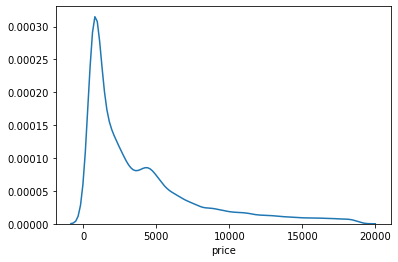

In [48]:
# yoğunluk grafiği
sns.distplot(df.price, hist = False);

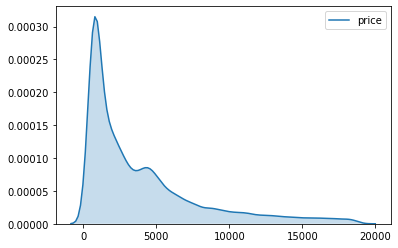

In [49]:
# karalı yoğunluk grafiği
sns.kdeplot(df.price, shade = True);

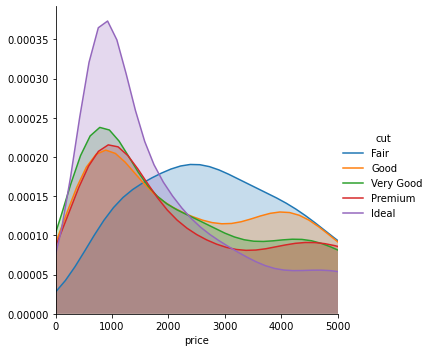

In [50]:
# grafiğe yakından ve daha detaylı bakmak
(sns
 .FacetGrid(df, 
            hue = "cut", 
            height = 5, 
            xlim = (0, 5000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

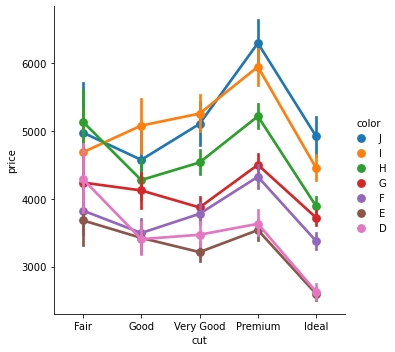

In [51]:
# noktalı üç boyutlu grafik
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

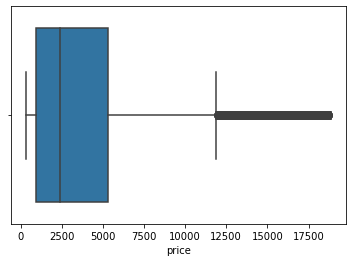

In [53]:
# kutu grafiği - yatay
sns.boxplot(df.price);

* çok fazla aykırı olarak görülen değer var.

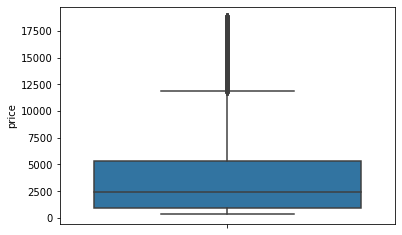

In [55]:
# kuru grafiği - dikey
sns.boxplot(df.price, orient = "v");